# **Problema de Retenção de Clientes (Churn)**

## Objetivo

- Esse projeto tem como objetivo prever o comportamento para a retenção de clientes, também conhecido como Churn. Para isso, utilizaremos um conjunto de dados com diferentes características do clientes.

- O dataset pode ser encontrado no link: https://www.kaggle.com/blastchar/telco-customer-churn

## Etapa 01 - Importação e verificação dos dados

In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Importação dos dados
dados = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
# Visualizar os 5 primeiros registros
dados.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Dicionário dos dados**
- **costumerID**: Identificador único do cliente
- **gender**: Gênero do cliente
- **SeniorCitizen**: O cliente é idoso(a)? (*1* - sim e *0* - não)
- **Partner**: O cliente tem um parceiro(a)? (*yes* - possui, *not* - não possui)
- **Dependents**: O cliente tem dependentes? (*yes* - possui, *not* - não possui)
- **tenure**: Número de meses que o cliente permaneceu na empresa
- **PhoneService**: O cliente possui serviço de telefonia? (*yes* - possui, *not* - não possui)
- **MultipleLines**: O cliente possui múltiplas linhas? (*yes* - possui, *not* - não possui, *No phone service* - sem serviço)
- **InternetService**: Provedor de internet do cliente (*DSL* - conexão DSL, *Fiber optic* - Fibra ótica, *No* - não possui)
- **OnlineSecurity**: O cliente possui serviço de segurança online? (*yes* - possui, *not* - não possui)
- **OnlineBackup**: O cliente possui serviço de backup online? (*yes* - possui, *not* - não possui)
- **DeviceProtection**: O cliente possui serviço de segurança do dispositivo? (*yes* - possui, *not* - não possui)
- **TechSupport**: O cliente possui suporte técnico? (*yes* - possui, *not* - não possui)
- **SteamingTV**: O cliente possui serviço de Streaming de TV ? (*yes* - possui, *not* - não possui)
- **StreamingMovies**: O cliente possui serviço de Streaming de filmes (*yes* - possui, *not* - não possui)
- **Contract**: Termo de contrato do cliente (*Month-to-month* - mensal, *One year* - anual, *Two year* - bianual)
- **PaperlessBilling**: O cliente é adepto de faturamento sem papel? (*yes* - sim, *not* - não)
- **PaymentMethod**: Forma de pagamento do cliente (*Electronic check* - cheque eletrônico, *Mailed check* - cheque enviado, *Bank transfer (automatic)* - transferência bancária automática, *Credit card (automatic)* - cartão de crédito automático)
- **MonthlyCharges**: Valor cobrado mensalmente do cliente
- **TotalCharges**: Valor total cobrado do cliente
- **Churn**: O cliente abandonou a empresa? (*yes* - sim, *not* - não)

In [4]:
# Informações sobre os dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Aqui já podemos verificar que a coluna TotalCharges está com o tipo incorreto, sendo necessária sua conversão para númerico. Vemos também que possuimos uma base de dados com 21 colunas e 7043 registros não nulos.

## Etapa 02 - Tratamento de dados

### Exclusão de variáveis

In [5]:
# Visualizar os 5 primeiros registros
dados.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Vamos descartar a coluna CostumerID, pois não fornece informações relevantes para o modelo de Machine Learning.

In [6]:
# Exclusão da coluna User ID
dados = dados.drop('customerID', axis = 1)

### Verificação de dados ausentes e nulos

Vamos verificar agora, se o conjunto de dados possui dados faltantes e nulos:

In [7]:
# Verificar valores ausentes
dados.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Não há dados faltantes.

In [8]:
# Verificar dados nulos
dados.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Podemos constatar que há 11 dados nulos na coluna Churn. Devido a pequena quantidade de registros nulos, optaremos em realizarmos a exclusão destes.

In [9]:
# Exclusão de dados nulos
dados = dados.dropna()

In [10]:
# Verificar dados nulos
dados.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
# Informação da base de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## Etapa 03 - Visualização de dados

Podemos visualizar a relação da variável alvo (Churn) com diferentes variáveis da base de dados. Para otimizarmos a análise, unificaremos registros que constem 'não' e 'nenhum'.

In [12]:
# Substituição de registros na coluna Churn
dados['Churn'] = dados['Churn'].replace(['No','Yes'],['Não','Sim'])

In [13]:
# Contagem de clientes em relação ao Churn
dados_ = dados['Churn'].value_counts()
dados_ 

Não    5174
Sim    1869
Name: Churn, dtype: int64

Podemos constatar que em nosso conjunto de dados possuem 5174 (**73,46%**)  clientes que permaneceram na empresa e 1869 (**26,53%**)  clientes que abandonaram o serviço.


### Variáveis categóricas

#### **Gênero x Churn**

In [14]:
# Substituição de registros na coluna gender
dados['gender'] = dados['gender'].replace(['Female','Male'],['Mulher','Homem'])

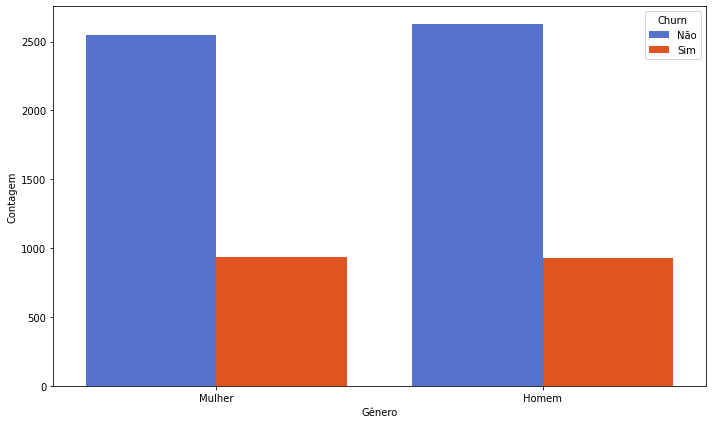

In [15]:
# Gênero x Churn
plt.style.use('seaborn-dark-palette')
plt.figure(figsize = (10,6))
sns.countplot(x = 'gender', data = dados, hue = 'Churn', palette = ['#4169E1','#FF4500'])
plt.xlabel('Gênero')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

Podemos notar um equilíbrio entre homens e mulheres que abandonam o serviço da empresa.

#### **Idoso(a) x Churn**

In [16]:
# Substituição de registros na coluna SeniorCitizen
dados['SeniorCitizen'] = dados['SeniorCitizen'].replace([0, 1],['Não','Sim'])

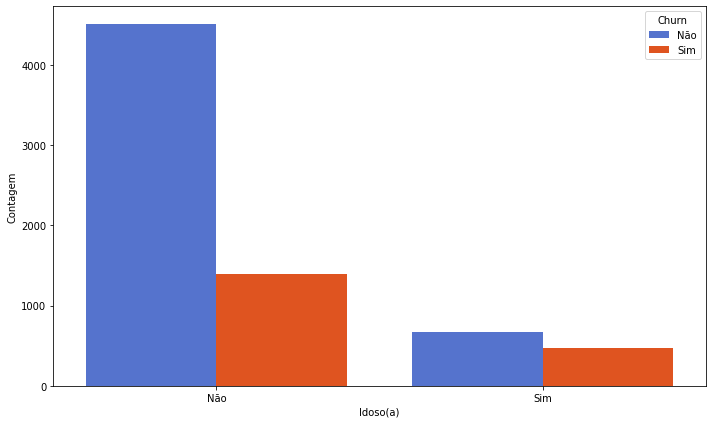

In [17]:
# Idoso(a) x Churn
plt.figure(figsize = (10,6))
sns.countplot(x = 'SeniorCitizen', data = dados, hue = 'Churn',  palette = ['#4169E1','#FF4500'])
plt.xlabel('Idoso(a)')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

Notamos que idosos tendem abandonar menos o serviço da empresa, porém também não apresentam uma permanência significativa.

#### **Parceiro(a) x Churn**

In [18]:
# Substituição de registros na coluna Partner
dados['Partner'] = dados['Partner'].replace(['Yes','No'],['Sim','Não'])

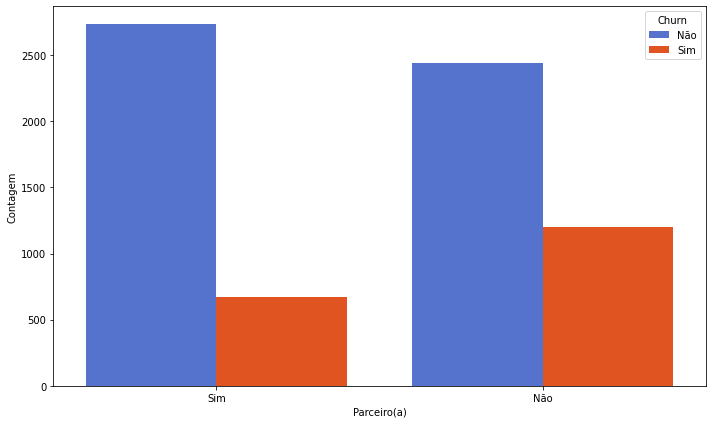

In [19]:
# Parceiro(a) x Churn
plt.figure(figsize = (10,6))
sns.countplot(x = 'Partner', data = dados, hue = 'Churn', palette = ['#4169E1','#FF4500'])
plt.xlabel('Parceiro(a)')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

Clientes que não possuem parceiro(a) apresentam uma maior tendência de abandono da empresa.

#### **Dependentes x Churn**

In [20]:
# Substituição de registros na coluna Dependents
dados['Dependents'] = dados['Dependents'].replace(['Yes','No'],['Sim','Não'])

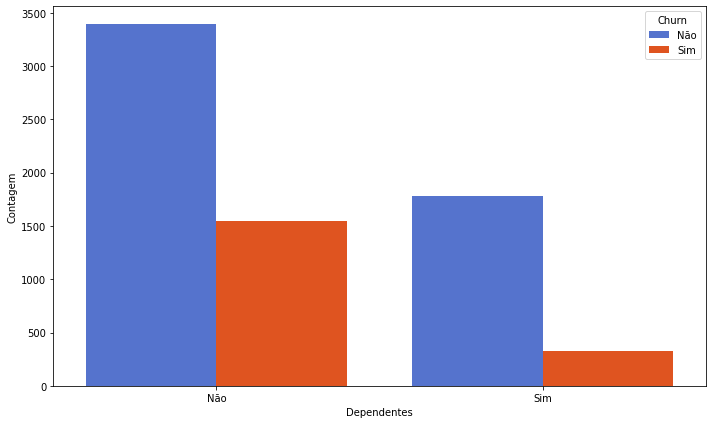

In [21]:
# Dependentes x Churn
plt.figure(figsize = (10,6))
sns.countplot(x = 'Dependents', data = dados, hue = 'Churn', palette = ['#4169E1','#FF4500'])
plt.xlabel('Dependentes')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

Podemos notar maior desistência ocorre em clientes que não possuem dependentes.

#### **Serviço de Telefonia x Churn**

In [22]:
# Substituição de registros na coluna PhoneService
dados['PhoneService'] = dados['PhoneService'].replace(['Yes','No'],['Sim','Não'])

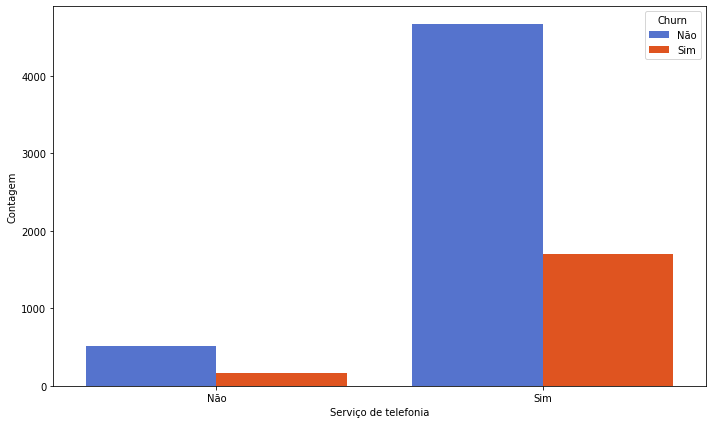

In [23]:
# Serviço de telefonia x Churn
plt.figure(figsize = (10,6))
sns.countplot(x = 'PhoneService', data = dados, hue = 'Churn',  palette = ['#4169E1','#FF4500'])
plt.xlabel('Serviço de telefonia')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

Aqui verificamos que clientes que possuem um serviço de telefonia apresentam uma tendência maior de abandono do serviço.

#### **Múltiplas linhas de telefone x Churn**

In [24]:
# Substituição de registros na coluna MultipleLines
dados['MultipleLines'] = dados['MultipleLines'].replace(['Yes','No', 'No phone service'],['Sim','Não', 'Não'])

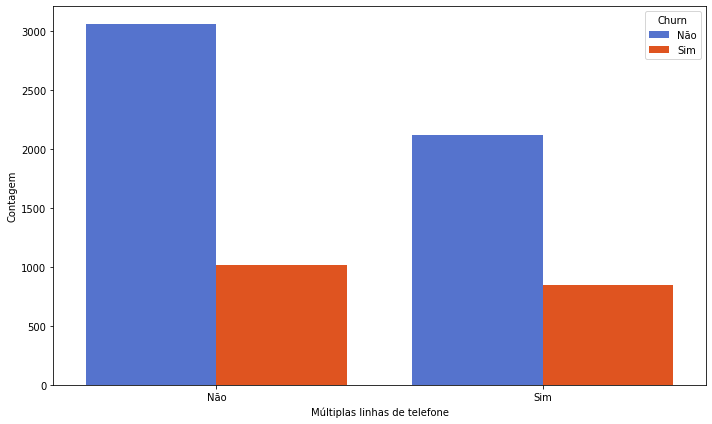

In [25]:
# Múltiplas linhas de telefone x Churn
plt.figure(figsize = (10,6))
sns.countplot(x = 'MultipleLines', data = dados, hue = 'Churn',  palette = ['#4169E1','#FF4500'])
plt.xlabel('Múltiplas linhas de telefone')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

Existe um equílibrio entre os clientes que possuem e não possuem múltiplas linhas de telefone. 

#### **Provedor de internet x Churn**

In [26]:
# Substituição de registros na coluna InternetService
dados['InternetService'] = dados['InternetService'].replace(['DSl','Fiber optic', 'No'],['DSL','Fibra Óptica', 'Nenhuma'])

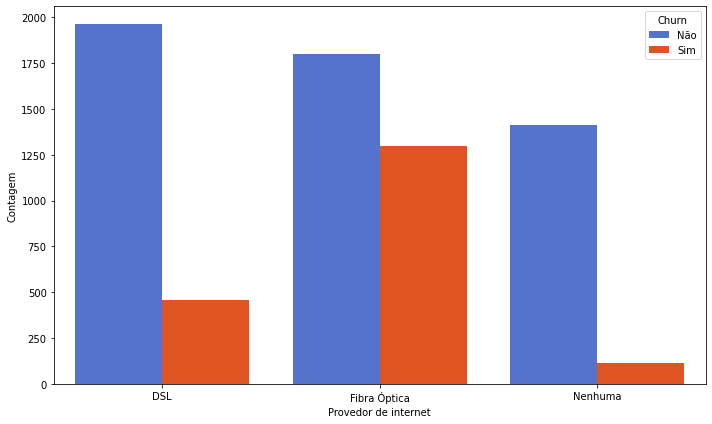

In [27]:
# Provedor de internet x Churn
plt.figure(figsize = (10,6))
sns.countplot(x = 'InternetService', data = dados, hue = 'Churn', palette = ['#4169E1','#FF4500'])
plt.xlabel('Provedor de internet')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

Notamos que clientes que possuem fibra ótica tem maior propensão ao abandono do serviço da empresa.

#### **Segurança Online x Churn**

In [28]:
# Substituição de registros na coluna OnlineSecurity
dados['OnlineSecurity'] = dados['OnlineSecurity'].replace(['No','Yes', 'No internet service'],['Não', 'Sim', 'Não'])

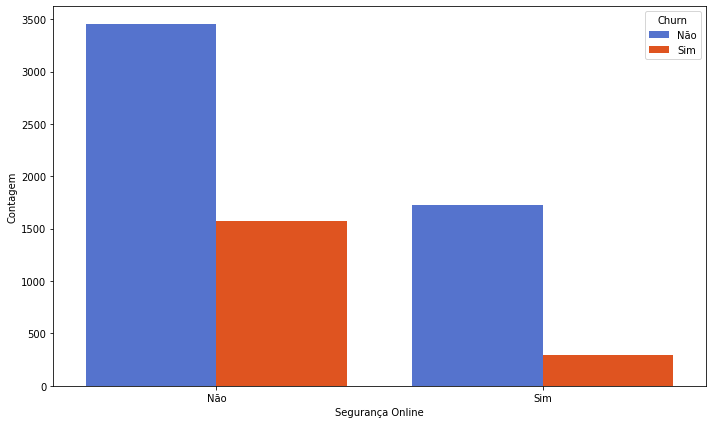

In [29]:
# Segurança Online x Churn
plt.figure(figsize = (10,6))
sns.countplot(x = 'OnlineSecurity', data = dados, hue = 'Churn', palette = ['#4169E1','#FF4500'])
plt.xlabel('Segurança Online')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

Nota-se que clientes que não possuem serviços de segurança online tendem a abandonar o serviço da empresa.

#### **Backup Online x Churn**

In [30]:
# Substituição de registros na coluna OnlineBackup
dados['OnlineBackup'] = dados['OnlineBackup'].replace(['No','Yes', 'No internet service'],['Não','Sim', 'Não'])

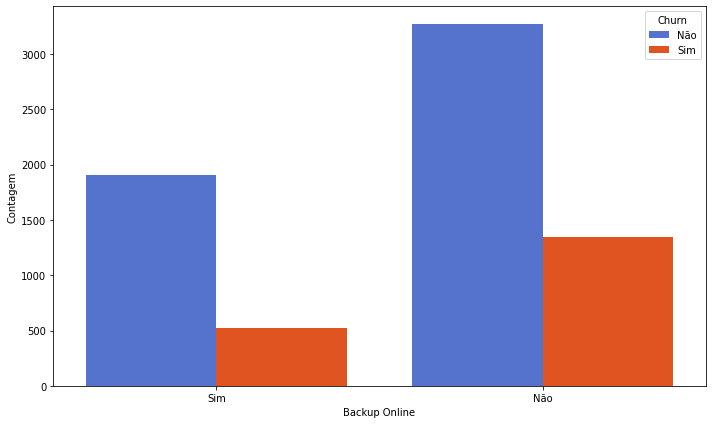

In [31]:
# Backup Online x Churn
plt.figure(figsize = (10,6))
sns.countplot(x = 'OnlineBackup', data = dados, hue = 'Churn', palette = ['#4169E1','#FF4500'])
plt.xlabel('Backup Online')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

Observamos que clientes que não possuem serviço de backup online tendem a abandonar o serviço com mais frequência.

#### **Proteção de dispositivo x Churn**

In [32]:
# Substituição de registros na coluna DeviceProtection
dados['DeviceProtection'] = dados['DeviceProtection'].replace(['No','Yes', 'No internet service'],['Não','Sim', 'Não'])

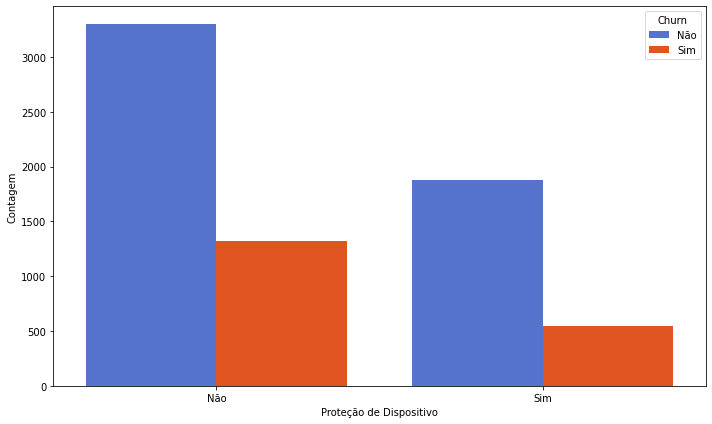

In [33]:
# Proteção de dispositivo x Churn
plt.figure(figsize = (10,6))
sns.countplot(x = 'DeviceProtection', data = dados, hue = 'Churn', palette = ['#4169E1','#FF4500'])
plt.xlabel('Proteção de Dispositivo')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

Verificamos que clientes que não possuem um serviço de proteção de dispositivo são mais propensas a desistir do serviço da empresa.

#### **Suporte técnico x Churn**

In [34]:
# Substituição de registros na coluna TechSupport
dados['TechSupport'] = dados['TechSupport'].replace(['No','Yes', 'No internet service'],['Não','Sim', 'Não'])

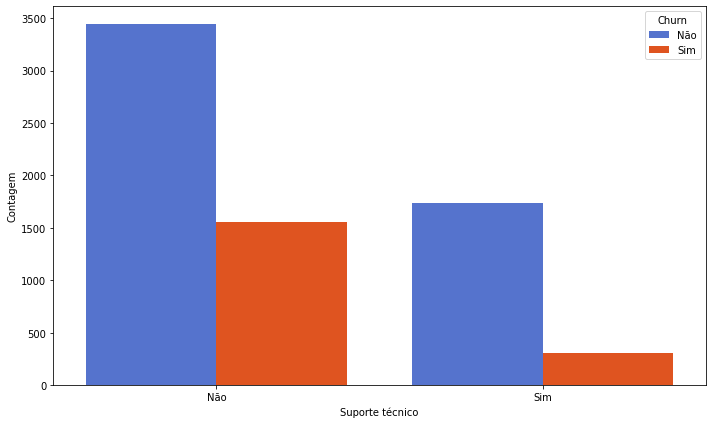

In [35]:
# Suporte técnico x Churn
plt.figure(figsize = (10,6))
sns.countplot(x = 'TechSupport', data = dados, hue = 'Churn', palette = ['#4169E1','#FF4500'])
plt.xlabel('Suporte técnico')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

Observamos que clientes que não possuem suporte técnico são os que mais abandonam o serviço da empresa.

#### **Streaming TV x Churn**

In [36]:
# Substituição de registros na coluna StreamingTV
dados['StreamingTV'] = dados['StreamingTV'].replace(['No','Yes', 'No internet service'],['Não','Sim', 'Não'])

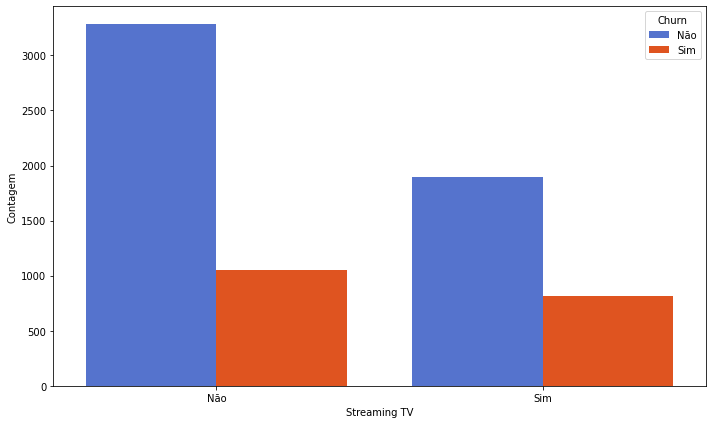

In [37]:
# Streaming TV x Churn
plt.figure(figsize = (10,6))
sns.countplot(x = 'StreamingTV', data = dados, hue = 'Churn', palette = ['#4169E1','#FF4500'])
plt.xlabel('Streaming TV')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

Podemos ver que o streaming de TV não exerce uma influência significativa na desistência do serviço.

#### **Streaming Filmes x Churn**

In [38]:
# Substituição de registros na coluna StreamingMovies
dados['StreamingMovies'] = dados['StreamingMovies'].replace(['No','Yes', 'No internet service'],['Não', 'Sim', 'Não'])

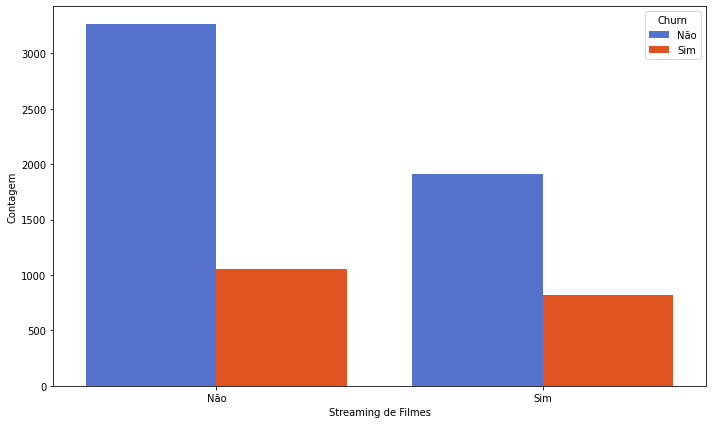

In [39]:
# Streaming de filmes x Churn
plt.figure(figsize = (10,6))
sns.countplot(x = 'StreamingMovies', data = dados, hue = 'Churn', palette = ['#4169E1','#FF4500'])
plt.xlabel('Streaming de Filmes')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

Aqui também podemos verificar que o streaming de filmes não exerce uma influência significativa na desistência do serviço.

#### **Termo de contrato x Churn**

In [40]:
# Substituição de registros na coluna Contract
dados['Contract'] = dados['Contract'].replace(['Month-to-month','One year', 'Two year'],['Mensal','Anual', 'Bianual'])

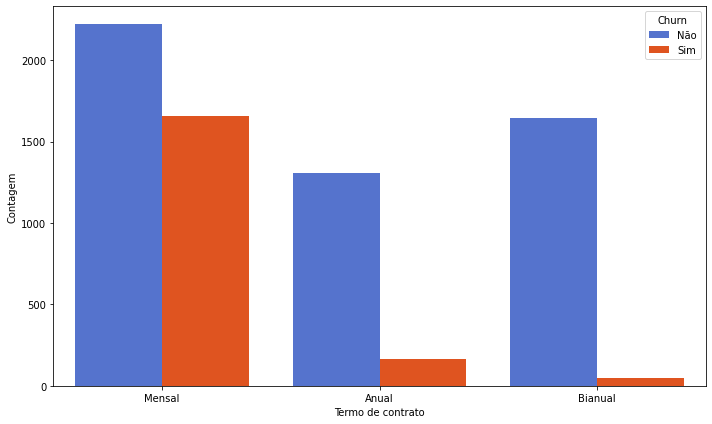

In [41]:
# Termo de contrato x Churn
plt.figure(figsize = (10,6))
sns.countplot(x = 'Contract', data = dados, hue = 'Churn', palette = ['#4169E1','#FF4500'])
plt.xlabel('Termo de contrato')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

Nota-se que os clientes que possuem o contrato mensal são os que mais abandonam o serviço da empresa. 

#### **Faturamento sem papel x Churn**

In [42]:
# Substituição de registros na coluna PaperlessBilling
dados['PaperlessBilling'] = dados['PaperlessBilling'].replace(['No', 'Yes'],['Não','Sim'])

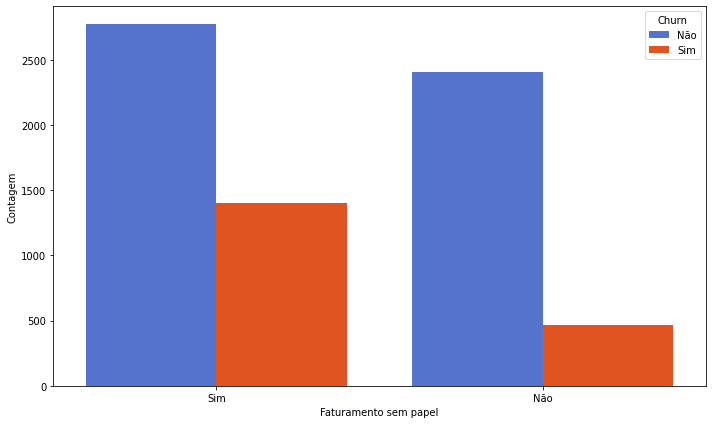

In [43]:
# Faturamento sem papel x Churn
plt.figure(figsize = (10,6))
sns.countplot(x = 'PaperlessBilling', data = dados, hue = 'Churn', palette = ['#4169E1','#FF4500'])
plt.xlabel('Faturamento sem papel')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

Observamos que os clientes adeptos de faturamento sem papel são mais propensos a abandonar o serviço da empresa.

#### **Forma de pagamento x Churn**

In [44]:
# Substituição de registros na coluna PaymentMethod
dados['PaymentMethod'] = dados['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'],
                                                        ['Cheque eletrônico','Cheque enviado', 'Transferência bancária', 'Cartão de crédito'])

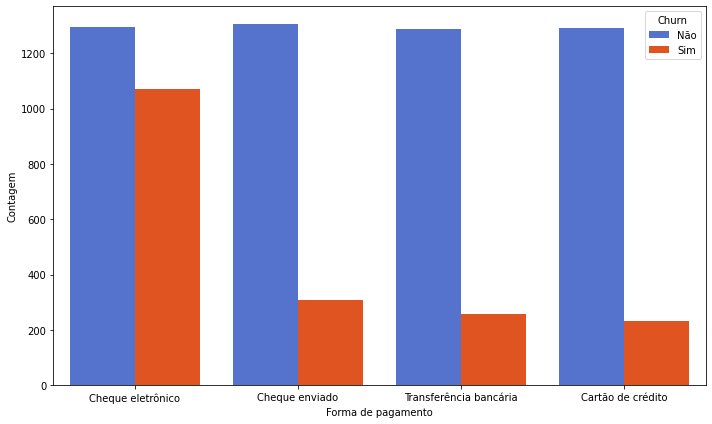

In [45]:
# Forma de pagamento x Churn
plt.figure(figsize = (10,6))
sns.countplot(x = 'PaymentMethod', data = dados, hue = 'Churn', palette = ['#4169E1','#FF4500'])
plt.xlabel('Forma de pagamento')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

Podemos verificar que os clientes que possuem a forma de pagamento como cheque eletrônico são os que mais abandonam o serviço da empresa.

### Variáveis numéricas

#### **Distribuição do Meses de permanência x Clientes**

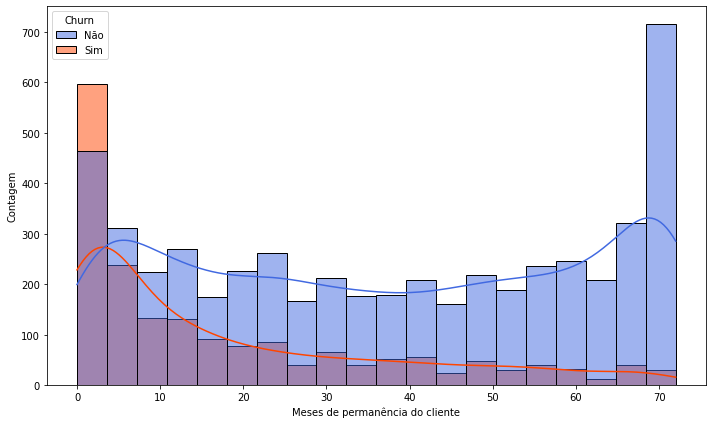

In [46]:
# Distribuição de Meses de permanência x Cliente
plt.figure(figsize = (10,6))
sns.histplot(x = dados['tenure'], data = dados, kde = True, bins = 20, hue = 'Churn', palette = ['#4169E1','#FF4500'])
plt.xlabel('Meses de permanência do cliente')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

Podemos visualizar que temos dois picos no gráfico que demonstra a permanência do cliente, sendo a maior parte dos clientes permanece 5 meses e o outro pico ocorre próximo a 70 meses. Como esperado, podemos verificar que o abandono ocorre com mais frequência nos primeiros 30 meses.

#### **Distribuição do Valor cobrado mensalmente x Clientes**

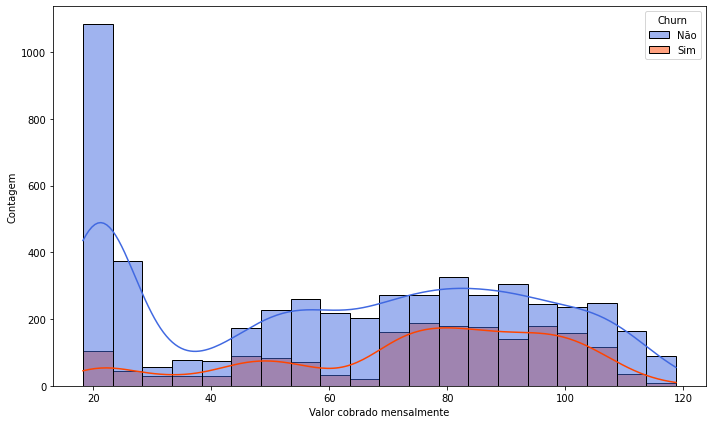

In [47]:
# Valor cobrado mensalmente x Clientes
plt.figure(figsize = (10,6))
sns.histplot(x = 'MonthlyCharges', data = dados, kde = True, bins = 20, hue = 'Churn', palette = ['#4169E1','#FF4500'])
plt.xlabel('Valor cobrado mensalmente')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

Aqui podemos visualizar que a maioria dos clientes paga 20 dólares, os demais possuem uma variação entre 40 a 120 dólares. 

Também podemos constatar que a maior a ocorrência de desistência acontece no intervalo entre 70 a 120 dólares.

Para elaborarmos a distribuição do valor total cobrado, necessitaremos alterar o tipo da variável TotalCharges para númerico:

#### **Distribuição do Valor total cobrado x Clientes**

In [48]:
dados['TotalCharges'] = pd.to_numeric(dados['TotalCharges'], errors = 'coerce')

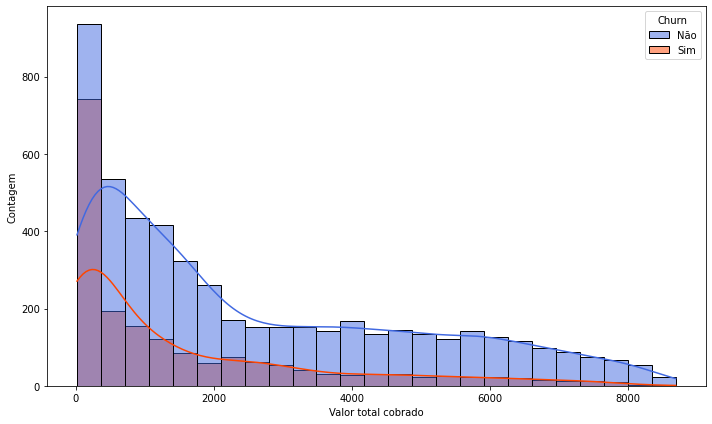

In [49]:
# Valor total cobrado  x Clientes
plt.figure(figsize = (10,6))
sns.histplot( x = 'TotalCharges', data = dados, hue = 'Churn', kde = True, palette = ['#4169E1','#FF4500'])
plt.xlabel('Valor total cobrado')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

Podemos visualizar que o valor total tem um pico entre 0 a 2000 dólares, isso evidencia o gasto geral dos clientes com o serviço proposto pela empresa. A distribuição apresenta uma similaridade entre clientes que permaneceram e que abandonaram o serviço.

Com esses insights importantes, podemos dar continuidade com o tratamento dos dados para a aplicação de modelos de Machine Learning.

## Etapa 04 - Preparação dos dados

Inicialmente, vamos verificar como nossos dados estão dispostos atualmente:

In [50]:
# Visualizar os 5 primeiros registros 
dados.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Mulher,Não,Sim,Não,1,Não,Não,DSL,Não,Sim,Não,Não,Não,Não,Mensal,Sim,Cheque eletrônico,29.85,29.85,Não
1,Homem,Não,Não,Não,34,Sim,Não,DSL,Sim,Não,Sim,Não,Não,Não,Anual,Não,Cheque enviado,56.95,1889.50,Não
2,Homem,Não,Não,Não,2,Sim,Não,DSL,Sim,Sim,Não,Não,Não,Não,Mensal,Sim,Cheque enviado,53.85,108.15,Sim
3,Homem,Não,Não,Não,45,Não,Não,DSL,Sim,Não,Sim,Sim,Não,Não,Anual,Não,Transferência bancária,42.30,1840.75,Não
4,Mulher,Não,Não,Não,2,Sim,Não,Fibra Óptica,Não,Não,Não,Não,Não,Não,Mensal,Sim,Cheque eletrônico,70.70,151.65,Sim


### Tratamento de variáveis categóricas

Necessitamos dummificar as variáveis categóricas para a aplicação de modelos de Machine Learning:

In [51]:
from sklearn.preprocessing import MultiLabelBinarizer

In [52]:
var_cat = ['gender','SeniorCitizen','Partner','Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling','Contract', 'PaymentMethod','Churn'] 

In [53]:
# Normalizar as variáveis númericas
for col in var_cat:
    mlb = MultiLabelBinarizer()
    dados[col] = mlb.fit_transform(dados[col])

In [54]:
# Visualizar 5 primeiros registros
dados.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,1,1,1,0,1,0,1,1,1,1,0,0,1,29.85,29.85,1
1,1,1,1,1,34,0,1,0,0,1,0,1,1,1,1,1,1,56.95,1889.50,1
2,1,1,1,1,2,0,1,0,0,0,1,1,1,1,0,0,1,53.85,108.15,0
3,1,1,1,1,45,1,1,0,0,1,0,0,1,1,1,1,1,42.30,1840.75,1
4,0,1,1,1,2,0,1,1,1,1,1,1,1,1,0,0,1,70.70,151.65,0


### Normalização das variáveis númericas

Como as variáveis númericas estão em diferente escalas, faz-se necessário a normalização das variáveis em apenas um intervalo.

In [55]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
var_num = ['tenure', 'MonthlyCharges','TotalCharges']

In [57]:
# Normalizar as variáveis númericas
for col in var_num:
    sc = MinMaxScaler()
    dados[col] = sc.fit_transform(dados[col].values.reshape(-1, 1))

In [58]:
# Visualizar os 5 primeiros registros
dados.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0.013889,1,1,0,1,0,1,1,1,1,0,0,1,0.115423,0.001275,1
1,1,1,1,1,0.472222,0,1,0,0,1,0,1,1,1,1,1,1,0.385075,0.215867,1
2,1,1,1,1,0.027778,0,1,0,0,0,1,1,1,1,0,0,1,0.354229,0.010310,0
3,1,1,1,1,0.625000,1,1,0,0,1,0,0,1,1,1,1,1,0.239303,0.210241,1
4,0,1,1,1,0.027778,0,1,1,1,1,1,1,1,1,0,0,1,0.521891,0.015330,0


In [59]:
# Verificar dados nulos
dados.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [60]:
# Exclusão de dados nulos
dados = dados.dropna()

In [61]:
# Verificar dados nulos
dados.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [62]:
# Visualizar estrutura dos dados
dados.shape

(7032, 20)

Com os dados devidamente tratados, podemos prepará-los para aplicar diferentes modelos de Machine Learning para podermos selecionarmos o qual obtiver melhor performance.

## Etapa 05 - Aplicação do Modelo de Machine Learning

Inicialmente, realizamos a separação das variáveis preditoras e a variável alvo:

In [63]:
X = dados.drop('Churn', axis = 1).values
y = dados['Churn'].values

Podemos agora, executar a separação dos dados em treinamento e teste:

In [64]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.25, random_state = 13)

Agora importaremos as principais métricas de avaliação de classificação, também criaremos listas vazias para armazenarmos as métricas de diferentes modelos:

In [65]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [66]:
# Criação de listas vazias
modelo = []
acur = []
prec = []
reca = []
f1 = []

Com tudo preparado, podemos agora testar modelos de classificação para os nossos dados:

#### **Modelo 01 - Regressão Logística**

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
# Instanciar o modelo
reglog = LogisticRegression()

In [69]:
reglog.fit(X_treino, y_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
# Previsões do modelo
y_pred = reglog.predict(X_teste)

In [71]:
# Calcular as métricas de avaliação
acur_reglog  = accuracy_score(y_teste, y_pred)
prec_reglog = precision_score(y_teste, y_pred)
reca_reglog = recall_score(y_teste, y_pred)
f1_reglog = f1_score(y_teste, y_pred)

In [72]:
# Armazenar métricas nas listas
modelo.append('Regressão Logística')
acur.append(acur_reglog)
prec.append(prec_reglog)
reca.append(reca_reglog)
f1.append(f1_reglog)

#### **Modelo 02 - Support Vector Machine**

In [73]:
from sklearn.svm import SVC

In [74]:
# Instanciar o modelo
svc = SVC()

In [75]:
svc.fit(X_treino, y_treino)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [76]:
# Previsões do modelo
y_pred = svc.predict(X_teste)

In [77]:
# Calcular as métricas de avaliação
acur_svc  = accuracy_score(y_teste, y_pred)
prec_svc = precision_score(y_teste, y_pred)
reca_svc = recall_score(y_teste, y_pred)
f1_svc = f1_score(y_teste, y_pred)

In [78]:
# Armazenar métricas nas listas
modelo.append('Support Vector Machine')
acur.append(acur_svc)
prec.append(prec_svc)
reca.append(reca_svc)
f1.append(f1_svc)

#### **Modelo 03 - Naive Bayes Gaussian**

In [79]:
from sklearn.naive_bayes import GaussianNB

In [80]:
# Instanciar o modelo
gaussian = GaussianNB()

In [81]:
# Treinar o modelo
gaussian.fit(X_treino, y_treino)

GaussianNB(priors=None, var_smoothing=1e-09)

In [82]:
# Previsões do modelo
y_pred = gaussian.predict(X_teste)

In [83]:
# Calcular as métricas de avaliação
acur_gaussian  = accuracy_score(y_teste, y_pred)
prec_gaussian = precision_score(y_teste, y_pred)
reca_gaussian = recall_score(y_teste, y_pred)
f1_gaussian = f1_score(y_teste, y_pred)

In [84]:
# Armazenar métricas nas listas
modelo.append('Naive Bayes Gaussian')
acur.append(acur_gaussian)
prec.append(prec_gaussian)
reca.append(reca_gaussian)
f1.append(f1_gaussian)

#### **Modelo 04 - Random Forest**

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
# Instanciar o modelo
rf = RandomForestClassifier()

In [87]:
rf.fit(X_treino, y_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [88]:
# Previsões do modelo
y_pred = rf.predict(X_teste)

In [89]:
# Calcular as métricas de avaliação
acur_rf  = accuracy_score(y_teste, y_pred)
prec_rf = precision_score(y_teste, y_pred)
reca_rf = recall_score(y_teste, y_pred)
f1_rf = f1_score(y_teste, y_pred)

In [90]:
# Armazenar métricas nas listas
modelo.append('Random Forest')
acur.append(acur_rf)
prec.append(prec_rf)
reca.append(reca_rf)
f1.append(f1_rf)

#### **Modelo 05 - Ada Boost**

In [91]:
from sklearn.ensemble import AdaBoostClassifier

In [92]:
# Instanciar o modelo
ada = AdaBoostClassifier()

In [93]:
ada.fit(X_treino, y_treino)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [94]:
# Previsões do modelo
y_pred = ada.predict(X_teste)

In [95]:
# Calcular as métricas de avaliação
acur_ada  = accuracy_score(y_teste, y_pred)
prec_ada = precision_score(y_teste, y_pred)
reca_ada = recall_score(y_teste, y_pred)
f1_ada = f1_score(y_teste, y_pred)

In [96]:
# Armazenar métricas nas listas
modelo.append('Ada Boost')
acur.append(acur_ada)
prec.append(prec_ada)
reca.append(reca_ada)
f1.append(f1_ada)

## Etapa 06 - Avaliação de Modelos

Para podermos realizar uma avaliação completa, podemos exibir em um DataFrame as métricas de cada modelo.

In [99]:
# Criação de DataFrame com as métricas calculadas
dic = {'Modelo': modelo, 'Acurácia': acur, 'Precisão': prec, 'Recall': reca, 'f1_score': f1,}
avaliacao = pd.DataFrame(dic)
avaliacao = avaliacao.sort_values(by = 'Recall', ascending = False)

In [100]:
# Exibir DataFrame
avaliacao

,Modelo,Acurácia,Precisão,Recall,f1_score
1,Support Vector Machine,0.788396,0.824843,0.907137,0.864035
0,Regressão Logística,0.796928,0.836415,0.902533,0.868217
4,Ada Boost,0.802617,0.844877,0.898695,0.870956
3,Random Forest,0.792378,0.835960,0.895625,0.864765
2,Naive Bayes Gaussian,0.778726,0.869741,0.825019,0.846790


Por fim, considerando como métrica alvo o Recall/Sensibilidade (*dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas*), podemos afirmar que o modelo **Support Vector Machine** foi o que obteve melhor performance na predição do perfil do cliente que permaneceria com o serviço da empresa. Desse modo, poderíamos classificar possíveis clientes que tem alguma probabilidade de deixar o serviço, de modo a agir preventivamente com ações de incentivo para a permanência do cliente.